In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
target = 'Depression'

In [3]:
print("--- Dataset Shapes ---")
print(f"Training set: {df_train.shape}")
print(f"Test set: {df_test.shape}")

print("\n--- Value distribution (%) in Depression column ---")
display(df_train['Depression'].value_counts(normalize=True).round(3) * 100)

print("\nSample of training data:")
display(df_train.head())

--- Dataset Shapes ---
Training set: (140700, 20)
Test set: (93800, 19)

--- Value distribution (%) in Depression column ---


Depression
0    81.8
1    18.2
Name: proportion, dtype: float64


Sample of training data:


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
df_train.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [5]:
print(f'There are {df_train.duplicated().sum()} duplicates.')

There are 0 duplicates.


# Visualize dataset

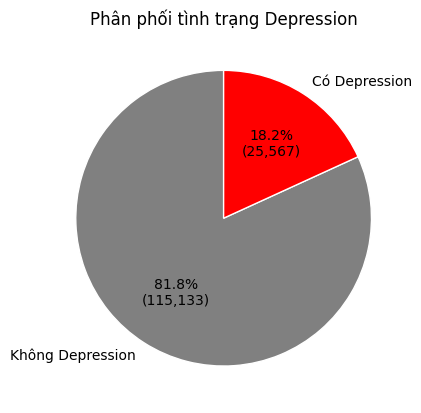

In [6]:
# Phân phối tình trạng Depression

depression_counts = df_train[target].value_counts()

# Tạo nhãn hiển thị số lượng + %
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f"{pct:.1f}%\n({val:,})"
    return my_autopct

plt.pie(
    depression_counts,
    autopct=make_autopct(depression_counts),
    labels=['Không Depression', 'Có Depression'],
    startangle=90,
    colors=['gray', 'red'],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.title("Phân phối tình trạng Depression")
plt.show()

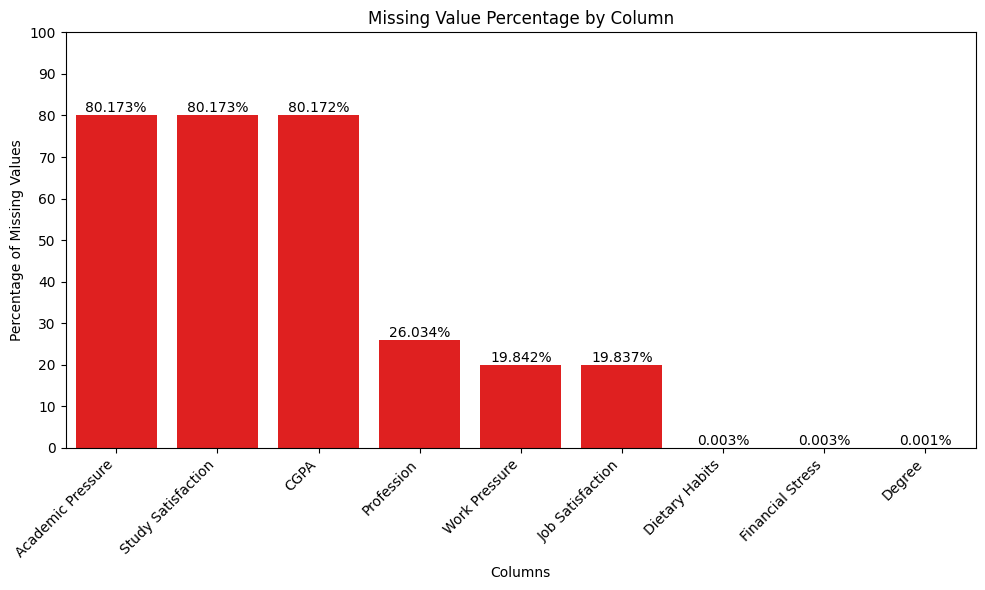

In [7]:
# Visualize missing data
missing_values_percentage = np.round(df_train.isna().mean()*100, 3)
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage.values, color='red')
plt.title('Missing Value Percentage by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation=45, ha='right')

# Add percentage labels
for i, v in enumerate(missing_values_percentage.values):
    ax.text(i, v, str(v) + '%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Missing Data Insights

- *Academic Pressure*, *Study Satisfaction*, and *CGPA* all have ~80% missing values. These features make sense only for students, not for working professionals.
- *Profession*, *Work Pressure* and *Job Satisfaction* have ~20–26% missing, but these missing entries likely correspond to students, who would not have these attributes.

$\rightarrow$ So instead of imputing all those missing values, we split the dataset base on the *Working Professional or Student* column.

## Split dataset into Working Professional and Student

In [8]:
df_train['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

In [9]:
# Split dataset into working professional and student
df_working = df_train[df_train["Working Professional or Student"].str.strip() == 'Working Professional']
df_student = df_train[df_train["Working Professional or Student"].str.strip() == 'Student']

## Visualize Working Professional and Student

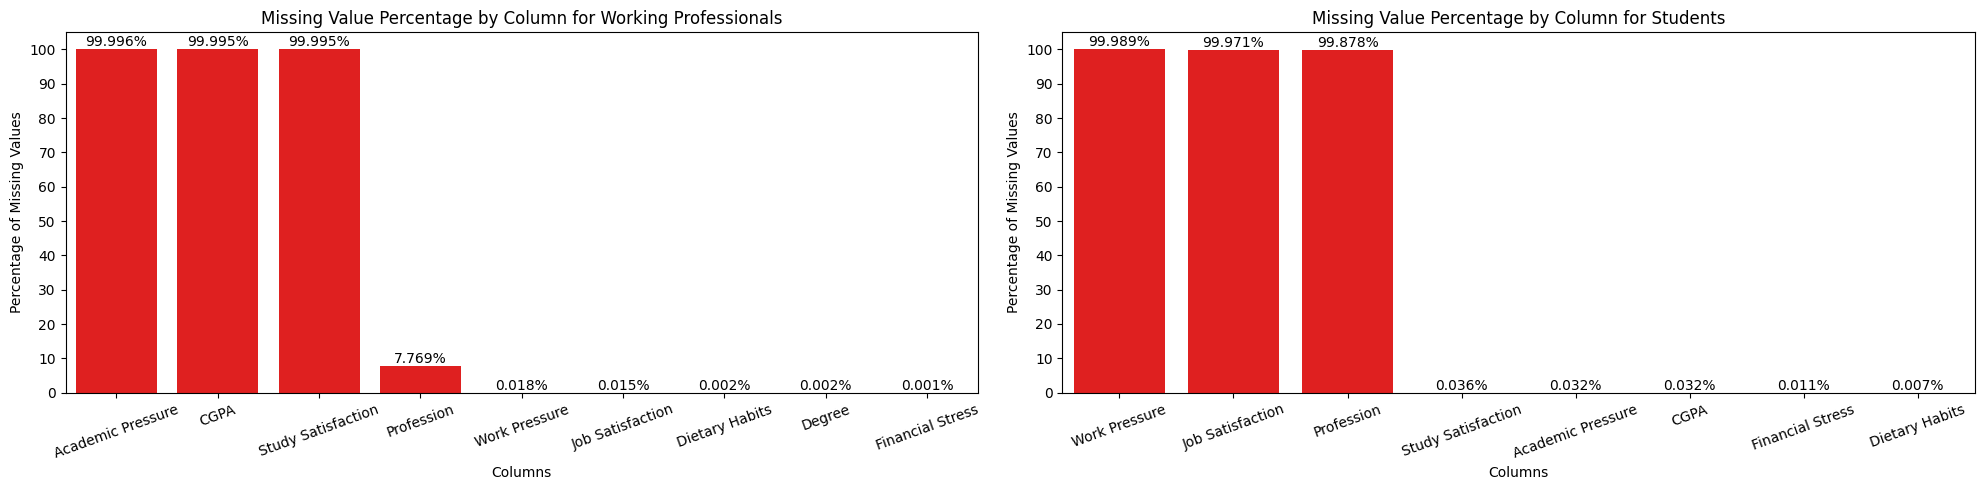

In [10]:
# Visualize missing data for each group
_, axes = plt.subplots(1, 2, figsize=(20, 5))

# Missing data for working professional
missing_percentage_working = np.round(df_working.isna().mean()*100, 3)
missing_percentage_working = missing_percentage_working[missing_percentage_working > 0].sort_values(ascending=False)

sns.barplot(x=missing_percentage_working.index, y=missing_percentage_working.values, color='red', ax=axes[0])
axes[0].set_title('Missing Value Percentage by Column for Working Professionals')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Percentage of Missing Values')
axes[0].set_yticks(np.arange(0, 101, 10))
axes[0].tick_params(axis='x', rotation=20)
# Add percentage labels
for i, v in enumerate(missing_percentage_working.values):
    axes[0].text(i, v, str(v) + '%', ha='center', va='bottom')


# Missing data for student
missing_percentage_student = np.round(df_student.isna().mean()*100, 3)
missing_percentage_student = missing_percentage_student[missing_percentage_student > 0].sort_values(ascending=False)

sns.barplot(x=missing_percentage_student.index, y=missing_percentage_student.values, color='red', ax=axes[1])
axes[1].set_title('Missing Value Percentage by Column for Students')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Percentage of Missing Values')
axes[1].set_yticks(np.arange(0, 101, 10))
axes[1].tick_params(axis='x', rotation=20)
# Add percentage labels
for i, v in enumerate(missing_percentage_student.values):
    axes[1].text(i, v, str(v) + '%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [11]:
# Drop columns not relevant to each group
df_working = df_working.drop(['Academic Pressure', 'Study Satisfaction', 'CGPA'], axis=1)
df_student = df_student.drop(['Work Pressure', 'Job Satisfaction', 'Profession'], axis=1)

# Depression Distribution

In [12]:
print(f'Number of people in working professional group: {df_working.shape[0]}')
print(f'Number of people in student group: {df_student.shape[0]}')

Number of people in working professional group: 112799
Number of people in student group: 27901


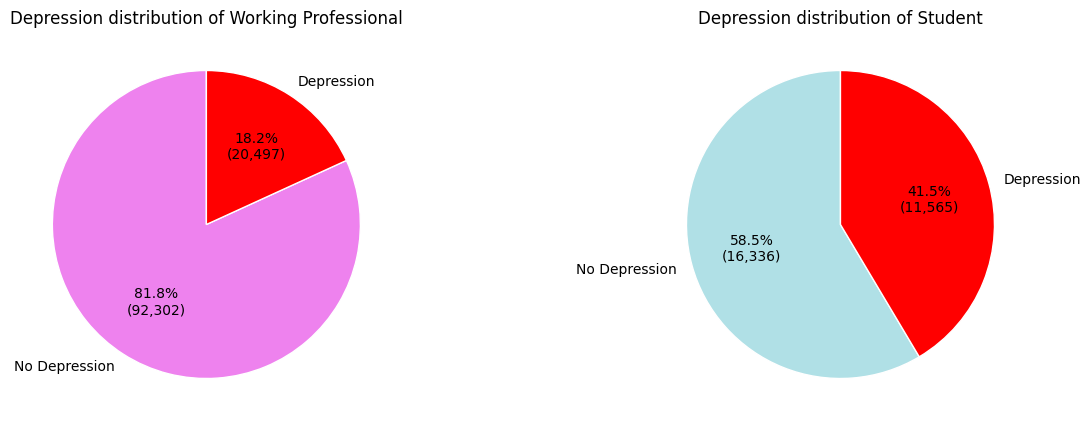

In [13]:
# Depression distribution for Working Professional and Student
_, axes = plt.subplots(1, 2, figsize=(15, 5))

# Display percentage and count on pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f"{pct:.1f}%\n({val:,})"
    return my_autopct


# Plot for working professional
depression_count_working = df_working[target].value_counts()
axes[0].pie(
    depression_counts,
    autopct=make_autopct(depression_count_working),
    labels=['No Depression', target],
    startangle=90,
    colors=['violet', 'red'],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
axes[0].set_title("Depression distribution of Working Professional")


# Plot for student
depression_count_student = df_student[target].value_counts()
axes[1].pie(
    depression_count_student,
    autopct=make_autopct(depression_count_student),
    labels=['No Depression', 'Depression'],
    startangle=90,
    colors=['powderblue', 'red'],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
axes[1].set_title("Depression distribution of Student")

plt.show()

### Depression Distribution Insights
- There's a lot more people in Working Professional dataset compare to Student.
- Students exhibit a significantly higher depression rate than working professionals (41.5% vs 18.2%).
- In contrast, the majority of working adults have lower depression rates.

In [14]:
df_student['CGPA'].describe()

count    27892.000000
mean         7.658575
std          1.464499
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

# CGPA Distribution

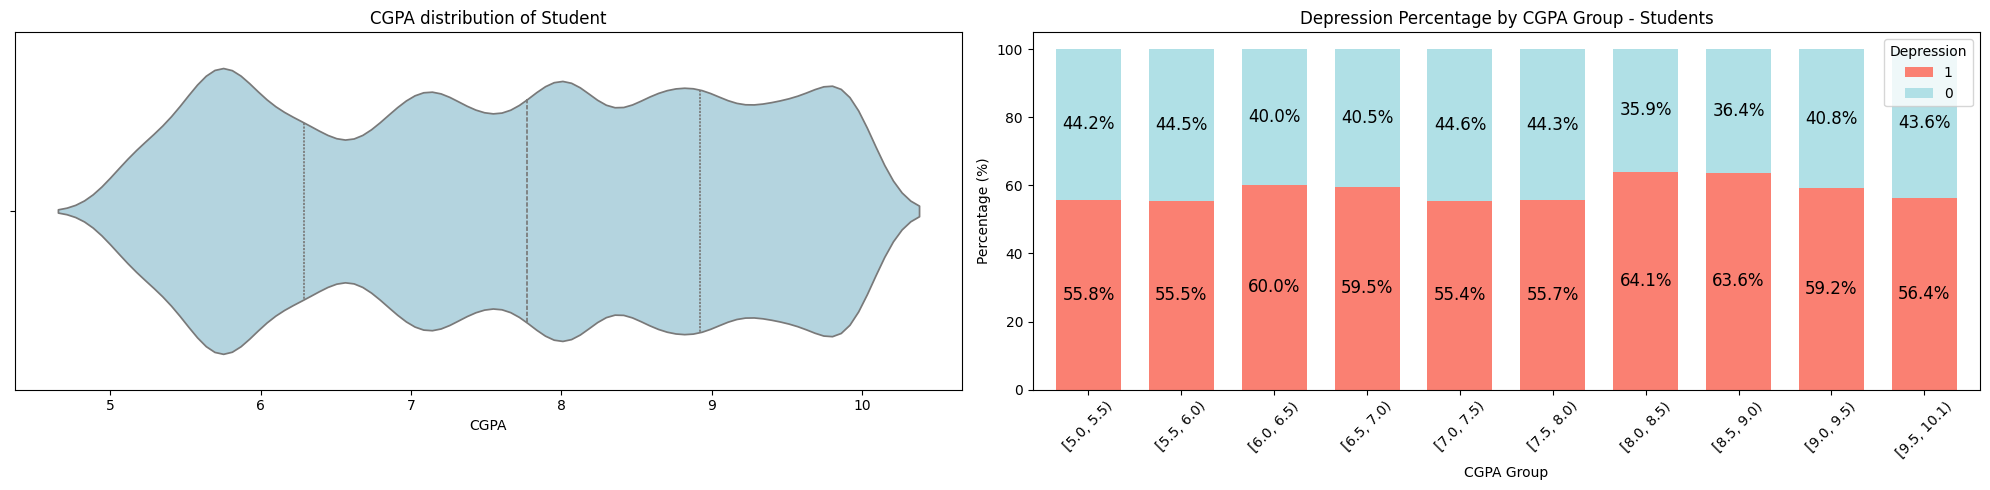

In [15]:
_, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.violinplot(data=df_student, 
               x='CGPA',
               ax=axes[0],
               inner='quartile',
               color='lightblue',
)

axes[0].set_title('CGPA distribution of Student')

df_student['cgpaGroup'] = pd.cut(df_student['CGPA'], bins=[5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10.1], right=False)
cgpa_group = df_student.groupby('cgpaGroup', observed=True)[target].value_counts(normalize=True).unstack() * 100
# Reverse column order so Depression (1) is on bottom, No Depression (0) is on top
cgpa_group = cgpa_group[[1, 0]]

bars = cgpa_group.plot(
    kind='bar',
    stacked=True,
    color=['salmon', 'powderblue'],
    width=0.7,
    ax=axes[1]
)
axes[1].set_title('Depression Percentage by CGPA Group - Students')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('CGPA Group')
axes[1].tick_params(axis='x', rotation=45)
# Add percentage labels
for container in axes[1].containers:
    bar_labels = [f'{v:.1f}%' if v > 0 else '' for v in container.datavalues]
    axes[1].bar_label(container, labels=bar_labels, label_type='center', fontsize=12)

plt.tight_layout()
plt.show()

### CGPA Insights

**1. Distribution**
- Most students have CGPA between 6 and 9.
- Very few have CGPA below 5.5 or above 9.8.
- The distribution is smooth and well-spread, indicating no extreme skewness.

**2. Depression percentage**
- Across all CGPA groups, the depression rate stays quite stable, hovering between:
    - 55%-60% depression.
    - 40%-45% non-depression.
- Even students with:
    - CGPA 9.0-10.0 $\rarr$ ~59-56% depressed.
    - CGPA 5.0-6.0 $\rarr$ ~55-56% depressed.

    $\rarr$ The rates are almost identical.

    $\rarr$ High-performing students are just as depressed as low-performing students.
- Students with CGPA 8.0-9.0 have the highest depression (~64%).

$\rarr$ CGPA does not meaningfully influence depression risk. High-achieving and low-achieving students experience nearly identical depression levels.

In [16]:
df_working['Age'].describe()

count    112799.000000
mean         43.991622
std          10.949170
min          18.000000
25%          38.000000
50%          46.000000
75%          53.000000
max          60.000000
Name: Age, dtype: float64

In [17]:
df_student['Age'].describe()

count    27901.000000
mean        25.822300
std          4.905687
min         18.000000
25%         21.000000
50%         25.000000
75%         30.000000
max         59.000000
Name: Age, dtype: float64

# Age

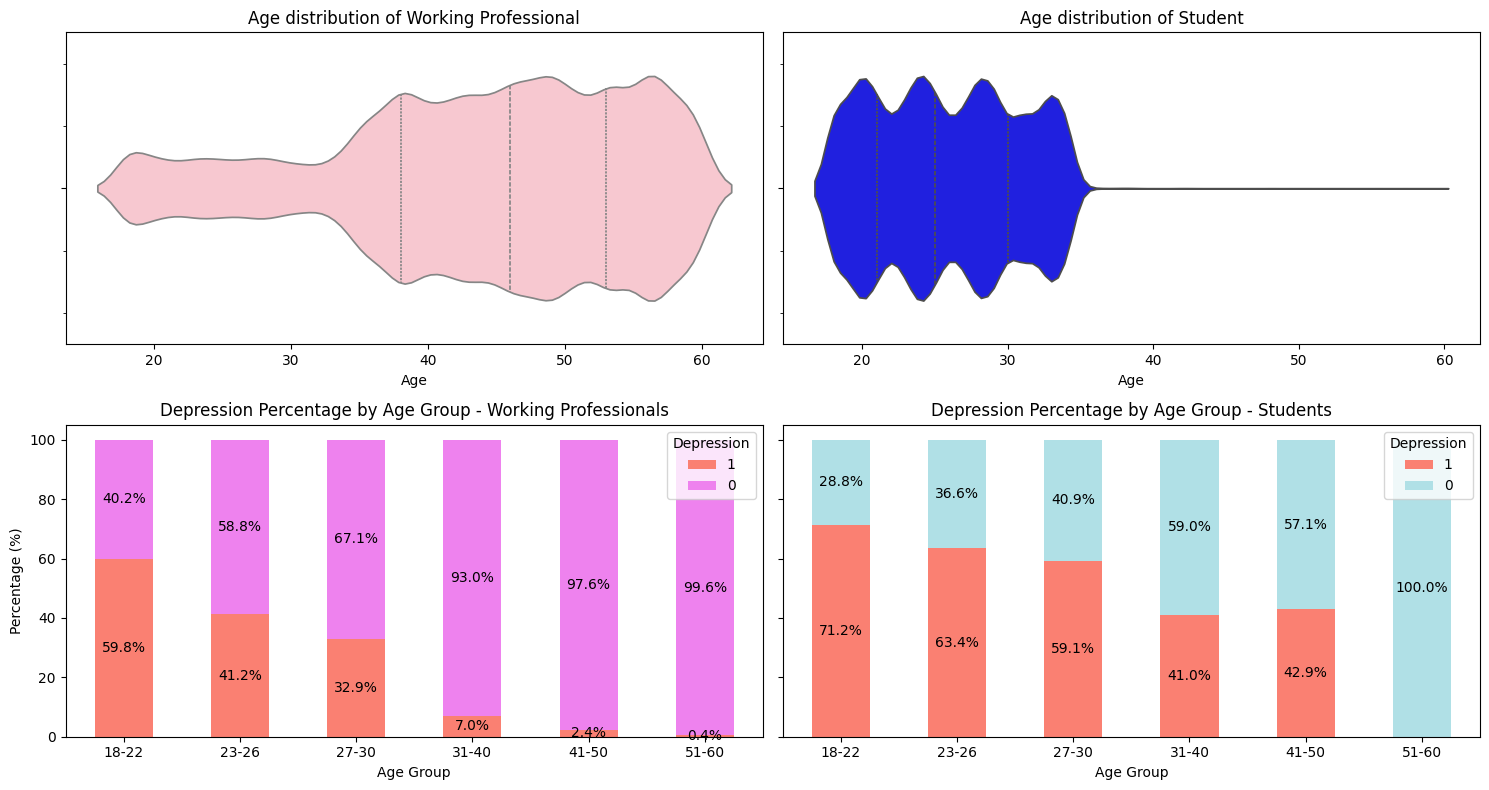

In [18]:
# Define age bins and labels
bins = [18, 22, 26, 30, 40, 50, 60]
labels = ['18-22', '23-26', '27-30', '31-40', '41-50', '51-60']

fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharey='row')

for i, d in enumerate([df_working, df_student]):
    sns.violinplot(data=d, 
                   x='Age',
                   ax=axes[0][i],
                #    hue=target,
                #    split=True,
                   gap=0.1,
                   inner='quartile',
                   color='pink' if d is df_working else 'blue',
    )
    axes[0][i].set_title(f'Age distribution of {"Working Professional" if d is df_working else "Student"}')


    d['AgeGroup'] = pd.cut(d['Age'], bins=bins, labels=labels, right=False)
    age_group = d.groupby("AgeGroup", observed=True)[target].value_counts(normalize=True).unstack() * 100
    # Reverse column order so Depression (1) is on bottom, No Depression (0) is on top
    age_group = age_group[[1, 0]]

    bars = age_group.plot(
        kind="bar",
        stacked=True,
        color=['salmon', 'violet' if d is df_working else 'powderblue'],
        ax=axes[1][i]
    )
    axes[1][i].set_title(f"Depression Percentage by Age Group - {'Working Professionals' if d is df_working else 'Students'}")
    axes[1][i].set_ylabel("Percentage (%)" if d is df_working else "")
    axes[1][i].set_xlabel("Age Group")
    axes[1][i].tick_params(axis='x', rotation=0)
    # Add percentage labels
    for container in axes[1][i].containers:
        bar_labels = [f'{v:.1f}%' if v > 0 else '' for v in container.datavalues]
        axes[1][i].bar_label(container, labels=bar_labels, label_type='center')

plt.tight_layout()
plt.show()


### Age Insights

**1. Working Professionals**
- Age distribution: Most are between 40-55 years old.
- Depression trend:
    - Younger workers (18-30) show higher depression rates - up to 60% in the youngest group.
    - Depression rates drop sharply with age - nearly 0% after age 40.

**2. Students**
- Age distribution: Concentrated in the 18–27 range, with few older students.
- Depression trend:
    - Depression is very common among younger students, around 60-70% in the 18-26 age range.
    - The rate declines gradually with age.
    - Students above 40 are few, but depression remains much lower than younger students.

**3. Comparison**
- Students overall have a higher depression rate than working professionals across all age groups.
- Work seems correlated with reduced depression risk after a certain age.
- Young adults (18-26) are the most vulnerable group in both populations.

# Work/Study Hours

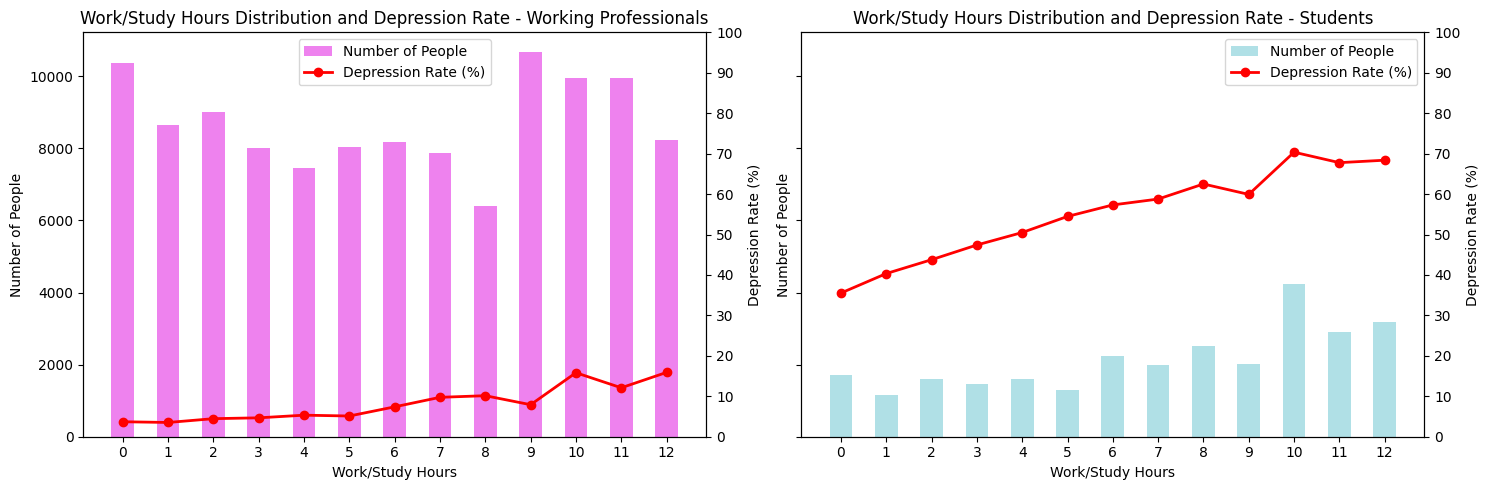

In [19]:
# Dietary Habits - Depression Percentage Distribution
_, ax1 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

for i, d in enumerate([df_working, df_student]):
    # Calculate count and depression percentage
    stats = (
        d.groupby('Work/Study Hours')[target]
        .agg(['count', 'mean'])
        .reset_index()
        .sort_values('Work/Study Hours')
    )
    stats[target] = stats['mean'] * 100

    # Bar plot — sleep duration distribution
    ax1[i].bar(
        stats['Work/Study Hours'],
        stats['count'],
        width=0.5,
        color='violet' if d is df_working else 'powderblue',
        align='center',
        label='Number of People'
    )
    ax1[i].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    ax1[i].set_ylabel('Number of People')
    ax1[i].set_xlabel('Work/Study Hours')
    ax1[i].set_title('Work/Study Hours Distribution and Depression Rate - ' + ('Working Professionals' if d is df_working else 'Students'))

    # Line plot — depression percentage
    ax2 = ax1[i].twinx()
    ax2.plot(
        stats['Work/Study Hours'],
        stats[target],
        color='red',
        marker='o',
        linewidth=2,
        label='Depression Rate (%)'
    )
    ax2.set_ylabel('Depression Rate (%)')

    # Set yticks from 0 to 100
    ax2.set_ylim(0, 100)
    ax2.set_yticks(np.arange(0, 101, 10))

    # Combine legends neatly
    lines, labels = ax1[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1[i].legend(lines + lines2, labels + labels2)

plt.tight_layout()
plt.show()

### Work/Study Hours Insights

**1. Working Professionals**
- Many professionals working 0 hours, depression rate remains relatively low in this group.
- Despite having the highest count in the chart, 9 hour workers have quite a low depression rate, even lower than 7-8 hour workers.
- 10-12 hour workers have high counts and show the highest depression percentages

**2. Students**
- Students studying 10-12 hours have ~70% depression rate. This is far higher than working professionals with long hours.
- Even moderate study (6-8h) shows ~60% depression.
- Students with low study hours still show notable depression. Even 0-2 hours $\rarr$ 35-45% depression, much higher than professionals working low hours.

**3. Comparison**
- At every hour level, students show far higher depression than professionals.
- *Students*'s depression rate increases more drastically than *Working Professionals* (~40-72% compare to ~3-20%).

# Gender, Suicidal thoughts & Family History of Mental Illness

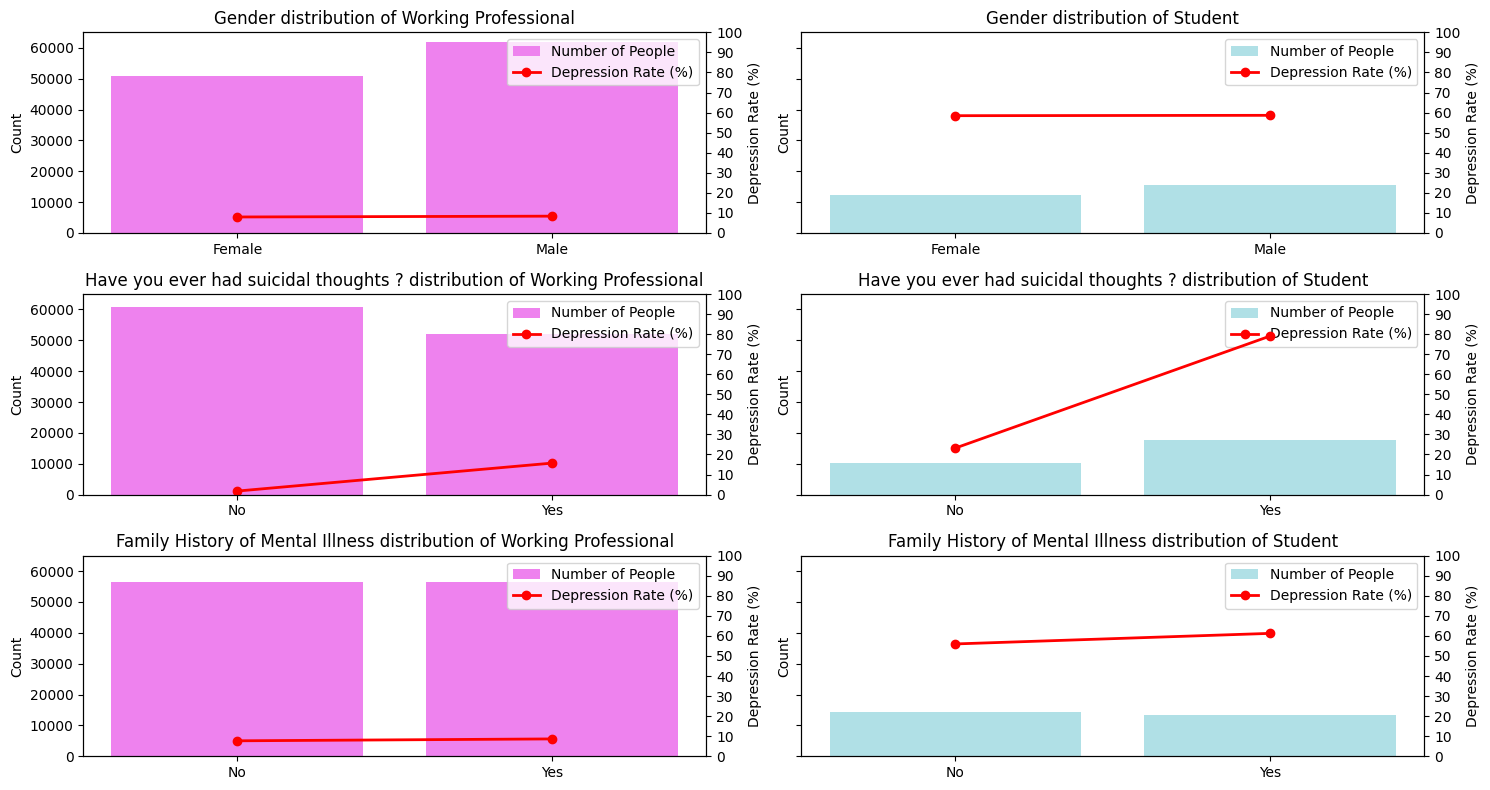

In [20]:
# Distribution of categorical variables for working professional and student
fig, axes = plt.subplots(3, 2, figsize=(15, 8), sharey=True)
categorical_cols_for_plot = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for i, col in enumerate(categorical_cols_for_plot):
    for j, d in enumerate([df_working, df_student]):
        if col == 'Work Pressure' and d is df_student: col = 'Academic Pressure'
        if col == 'Job Satisfaction' and d is df_student: col = 'Study Satisfaction'

        stats = (
            d.groupby(col)[target]
            .agg(['count', 'mean'])
            .reset_index()
            .sort_values(col)
        )
        stats[target] = stats['mean'] * 100

        axes[i][j].bar(
                    stats[col],
                    stats['count'],
                    color='violet' if d is df_working else 'powderblue',
                    align='center',
                    label='Number of People'
        )
        axes[i][j].set_title(f'{col} distribution of ' + ('Working Professional' if d is df_working else 'Student'))
        axes[i][j].set_ylabel('Count')
        axes[i][j].tick_params(axis='x', rotation=0)


        ax2 = axes[i][j].twinx()
        ax2.plot(
            stats[col],
            stats[target],
            color='red',
            marker='o',
            linewidth=2,
            label='Depression Rate (%)'
        )
        ax2.set_ylabel('Depression Rate (%)')

        # Set yticks from 0 to 100
        ax2.set_ylim(0, 100)
        ax2.set_yticks(np.arange(0, 101, 10))

        # Combine legends neatly
        lines, labels = axes[i][j].get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        axes[i][j].legend(lines + lines2, labels + labels2, loc='upper right')


plt.tight_layout()
plt.show()

### Gender, Suicidal Thoughts, Family Mental Illness Insights

**1. Working Professionals**
- **Gender**: Depression rates are low for both genders.
- **Suicidal Thoughts**:
  - “No” stays in single digits while “Yes” aligns with a higher depression rate. 
  - Interestingly, a large number of working professionals say “Yes, I have had suicidal thoughts". But only ~20% of those people are classified as *depressed* in the dataset.
- **Family History of Mental Illness**: Depression rate is higher for those with a family history of mental illness albeit really slightly.


**2. Students**
- **Gender**: Depression rates for both genders are very high, around 60%.
- **Suicidal Thoughts**: About 80% of students has *depression* in the “Yes” group; “No” is still high, reflecting the elevated baseline among students.
- **Family History of Mental Illness**: Both “No” and “Yes” categories show very high depression, but “Yes” group is a bit higher (~62%).


**3. Comparison**
- **Gender** and **Family History of Mental Illness** do not significantly affect depression rates in either group.
- **Suicidal thoughts** is the single most discriminative factor in both groups.
- Students exhibit far higher depression at every level across these factors, even low-risk categories among students exceed high-risk categories among professionals.


# Financial Stress, Work/Study Pressure & Job/Academic Satisfaction

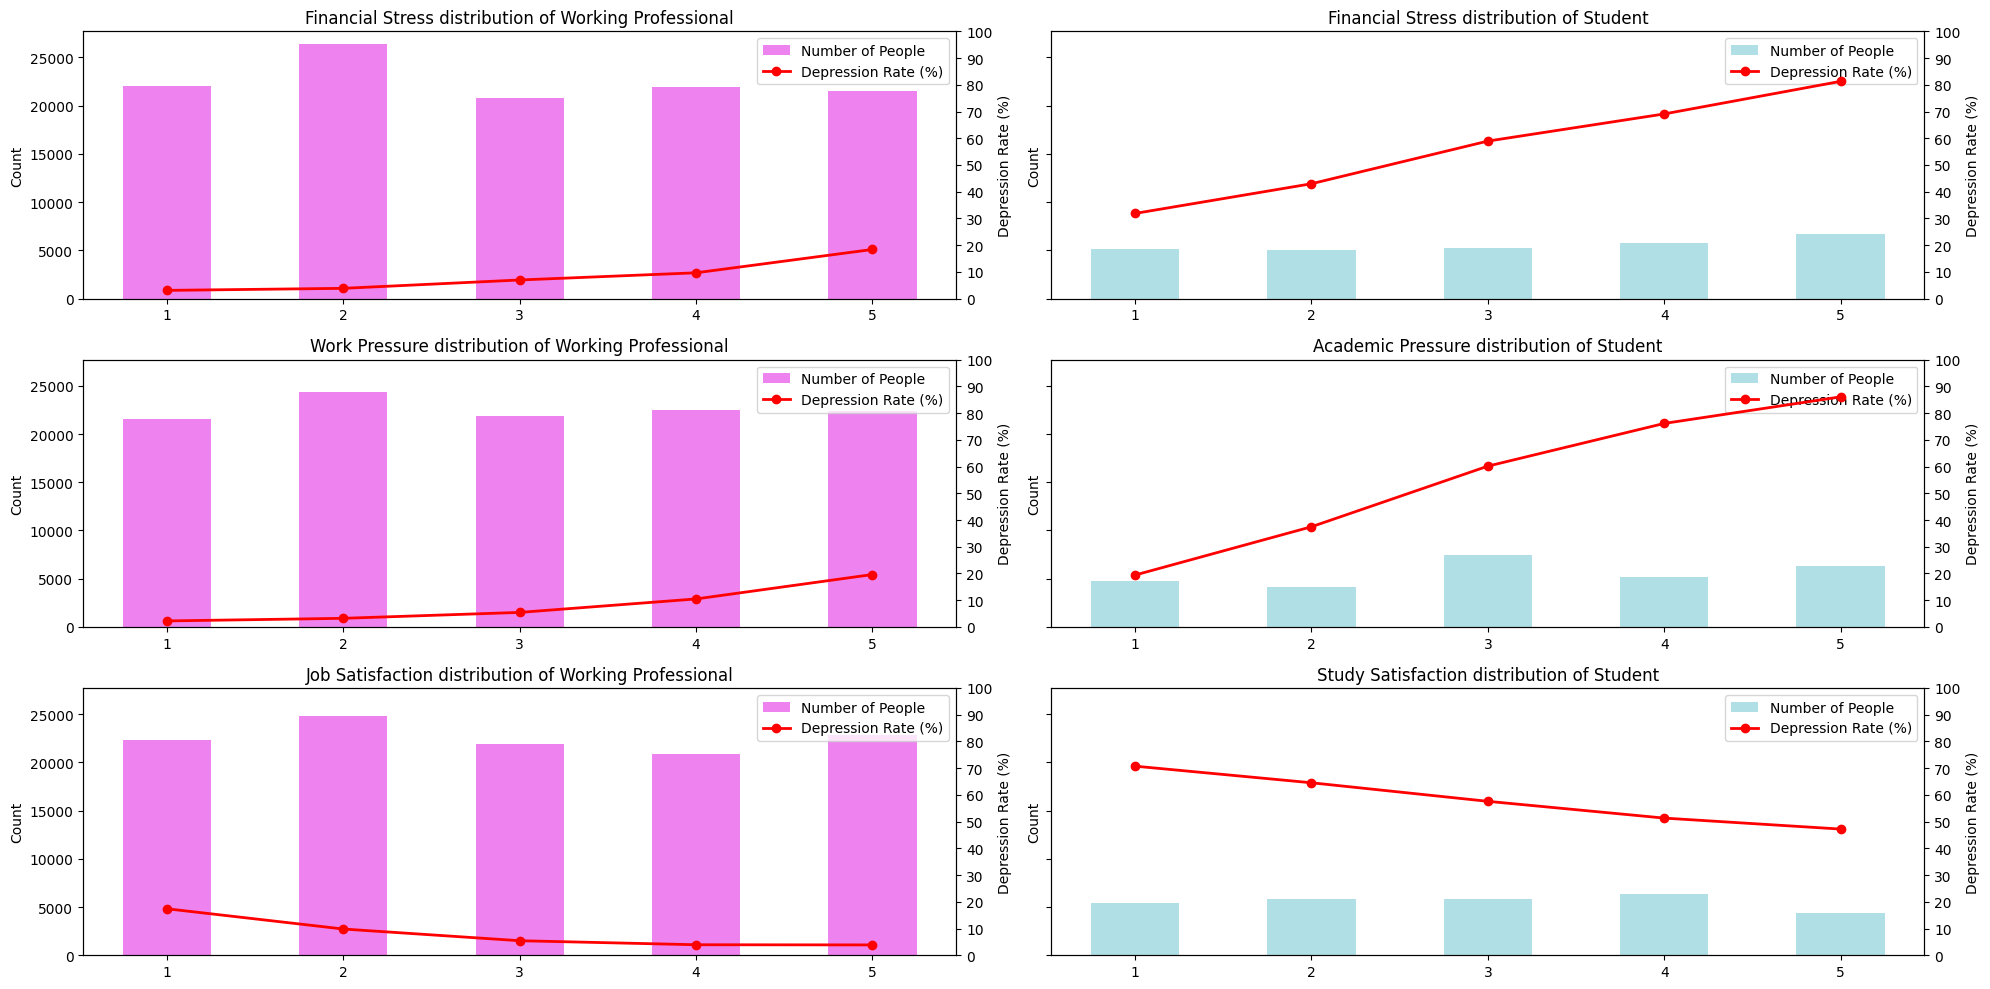

In [21]:
# Distribution of stress, pressure, and satisfaction variables for working professional and student
fig, axes = plt.subplots(3, 2, figsize=(20, 10), sharey=True)
categorical_cols_for_plot = ['Financial Stress', 'Work Pressure', 'Job Satisfaction']

for i, col in enumerate(categorical_cols_for_plot):
    for j, d in enumerate([df_working, df_student]):
        if col == 'Work Pressure' and d is df_student: col = 'Academic Pressure'
        if col == 'Job Satisfaction' and d is df_student: col = 'Study Satisfaction'

        stats = (
            d.groupby(col)[target]
            .agg(['count', 'mean'])
            .reset_index()
            .sort_values(col)
        )
        stats[target] = stats['mean'] * 100

        axes[i][j].bar(
                    stats[col],
                    stats['count'],
                    width=0.5,
                    color='violet' if d is df_working else 'powderblue',
                    align='center',
                    label='Number of People'
        )
        axes[i][j].set_title(f'{col} distribution of ' + ('Working Professional' if d is df_working else 'Student'))
        axes[i][j].set_ylabel('Count')
        axes[i][j].tick_params(axis='x', rotation=0)


        ax2 = axes[i][j].twinx()
        ax2.plot(
            stats[col],
            stats[target],
            color='red',
            marker='o',
            linewidth=2,
            label='Depression Rate (%)'
        )
        ax2.set_ylabel('Depression Rate (%)')

        # Set yticks from 0 to 100
        ax2.set_ylim(0, 100)
        ax2.set_yticks(np.arange(0, 101, 10))

        # Combine legends neatly
        lines, labels = axes[i][j].get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        axes[i][j].legend(lines + lines2, labels + labels2, loc='upper right')


plt.tight_layout()
plt.show()

### Financial Stress, Work/Study Pressure & Job/Academic Satisfaction Insights

**1. Working Professionals**
- **Financial Stress**: Positive correlation with depression - more stress, more depression.
- **Work Pressure**: Higher pressure is associated with higher depression across categories.
- **Job Satisfaction**: Higher satisfaction aligns with lower depression.

**2. Students**
- **Financial Stress**: Strong positive trend - more stress, more depression.
- **Academic Pressure**: Strong monotonic increase; higher pressure corresponds to markedly higher depression.
- **Study Satisfaction**: Higher satisfaction lowers depression, but baseline remains high across all levels.

**3. Comparison**
- At every level of **stress/pressure/satisfaction**, students show far higher depression than professionals.
- Effects are steeper for students (**pressure** and **financial stress** increase at a higher rate) than for professionals.
- Professionals show more gradual changes, but depression still increases with **work pressure** and **financial stress**.
- Students are much more sensitive to **financial stress** than professionals

In [22]:
# Mapping Sleep Duration and Dietary Habits variables to numerical values

gender={
    'Male':1,
    'Female':0,
}

work={
    'Working Professional':1,
    'Student':0,
}

suicidal_thought={
    'Yes':1,
    'No':0,
}

family_history={
    'Yes':1,
    'No':0,
}

sleep={
    'Less than 5 hours':4,
    '7-8 hours':7.5,
    'More than 8 hours':9, 
    '5-6 hours':5.5,
}

diet={
    'Healthy':2,
    'Moderate':1,
    'Unhealthy':0,   
}

df_working['Gender'] = df_working['Gender'].map(gender)
df_working['Have you ever had suicidal thoughts ?'] = df_working['Have you ever had suicidal thoughts ?'].map(suicidal_thought)
df_working['Family History of Mental Illness'] = df_working['Family History of Mental Illness'].map(family_history)
df_working['Sleep Duration'] = df_working['Sleep Duration'].map(sleep)
df_working['Dietary Habits'] = df_working['Dietary Habits'].map(diet)

df_student['Gender'] = df_student['Gender'].map(gender)
df_student['Have you ever had suicidal thoughts ?'] = df_student['Have you ever had suicidal thoughts ?'].map(suicidal_thought)
df_student['Family History of Mental Illness'] = df_student['Family History of Mental Illness'].map(family_history)
df_student['Sleep Duration'] = df_student['Sleep Duration'].map(sleep)
df_student['Dietary Habits'] = df_student['Dietary Habits'].map(diet)

# Dietary Habits

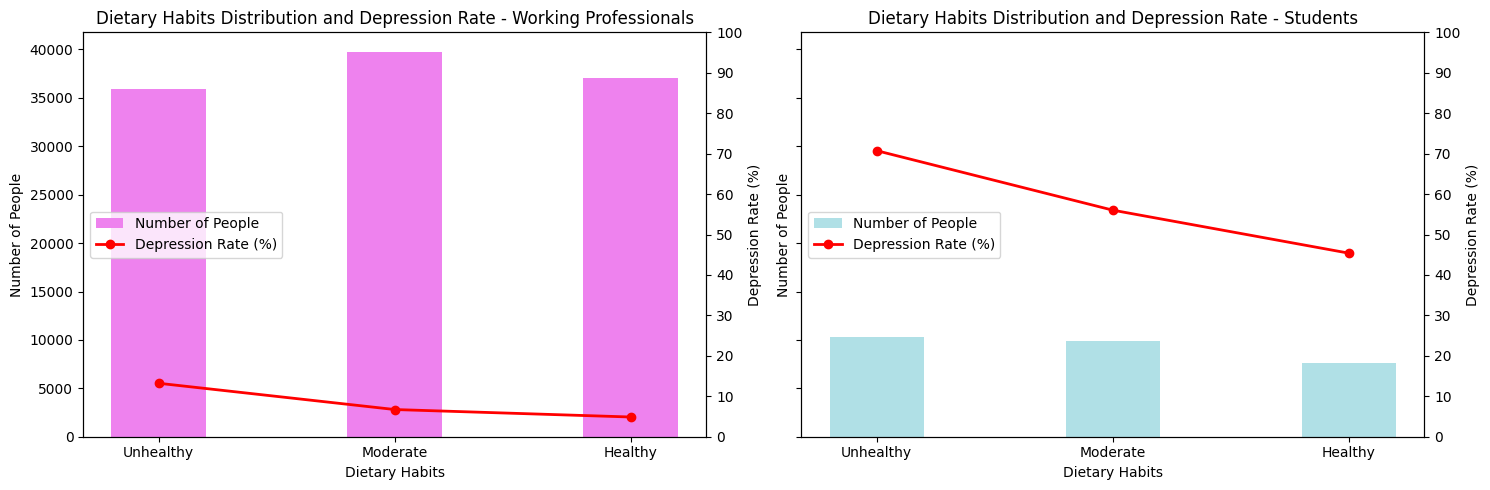

In [23]:
# Dietary Habits - Depression Percentage Distribution
_, ax1 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

for i, d in enumerate([df_working, df_student]):
    # Calculate count and depression percentage
    dietary_stats = (
        d.groupby('Dietary Habits')[target]
        .agg(['count', 'mean'])
        .reset_index()
        .sort_values('Dietary Habits')
    )
    dietary_stats[target] = dietary_stats['mean'] * 100

    # Bar plot — sleep duration distribution
    ax1[i].bar(
        dietary_stats['Dietary Habits'],
        dietary_stats['count'],
        width=0.4,
        color='violet' if d is df_working else 'powderblue',
        align='center',
        label='Number of People'
    )
    ax1[i].set_xticks([0, 1, 2], ['Unhealthy', 'Moderate', 'Healthy'])
    ax1[i].set_ylabel('Number of People')
    ax1[i].set_xlabel('Dietary Habits')
    ax1[i].set_title('Dietary Habits Distribution and Depression Rate - ' + ('Working Professionals' if d is df_working else 'Students'))

    # Line plot — depression percentage
    ax2 = ax1[i].twinx()
    ax2.plot(
        dietary_stats['Dietary Habits'],
        dietary_stats[target],
        color='red',
        marker='o',
        linewidth=2,
        label='Depression Rate (%)'
    )
    ax2.set_ylabel('Depression Rate (%)')

    # Set yticks from 0 to 100
    ax2.set_ylim(0, 100)
    ax2.set_yticks(np.arange(0, 101, 10))

    # Combine legends neatly
    lines, labels = ax1[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1[i].legend()
    ax1[i].legend(lines + lines2, labels + labels2, loc='center left')

plt.tight_layout()
plt.show()

### Dietary Habits Insights

**1. Working Professionals**
- Most working professionals report Moderate eating habits.
- The number of working professionals is fairly uniform across all three diet groups.
- Depression rate steadily decreases as diet quality improves:
    - Unhealthy diets $\rarr$ highest depression (~10-12%)
    - Moderate diets $\rarr$ lower (~7-8%)
    - Healthy diets $\rarr$ lowest (~5%)

**2. Students**
- Unhealthy diet group has the largest number of students..
- Depression rates are much higher in all dietary categories (~45-70%).
- Even students with healthy diets have high depression (~70%).

**3. Comparison**
- The same pattern appears for both groups - poor nutrition strongly associates with higher depression.
- Students show a much steeper drop in depression as diet improves compared to professionals.

# Sleep Duration

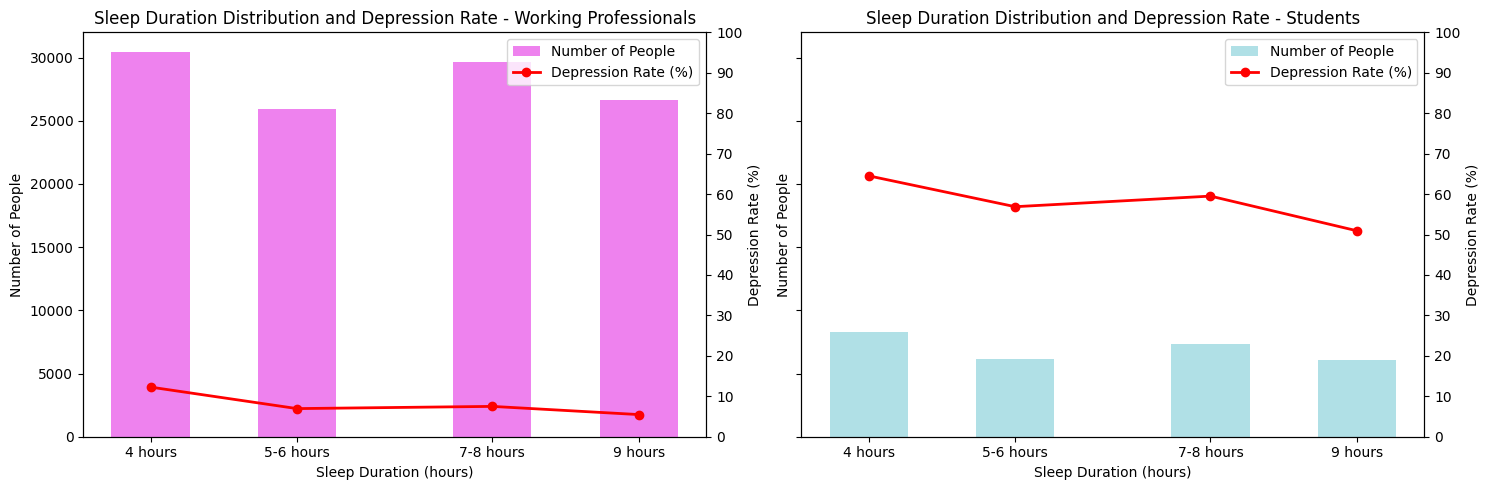

In [24]:
# Sleep Duration - Depression Percentage Distribution
_, ax1 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

for i, d in enumerate([df_working, df_student]):
    # Calculate count and depression percentage
    sleep_stats = (
        d.groupby('Sleep Duration')[target]
        .agg(['count', 'mean'])
        .reset_index()
        .sort_values('Sleep Duration')
    )
    sleep_stats[target] = sleep_stats['mean'] * 100

    # Bar plot — sleep duration distribution
    ax1[i].bar(
        sleep_stats['Sleep Duration'],
        sleep_stats['count'],
        color='violet' if d is df_working else 'powderblue',
        align='center',
        label='Number of People'
    )
    ax1[i].set_xticks([4, 5.5, 7.5, 9], ['4 hours', '5-6 hours', '7-8 hours', '9 hours'])
    ax1[i].set_ylabel('Number of People')
    ax1[i].set_xlabel('Sleep Duration (hours)')
    ax1[i].set_title('Sleep Duration Distribution and Depression Rate - ' + ('Working Professionals' if d is df_working else 'Students'))

    # Line plot — depression percentage
    ax2 = ax1[i].twinx()
    ax2.plot(
        sleep_stats['Sleep Duration'],
        sleep_stats[target],
        color='red',
        marker='o',
        linewidth=2,
        label='Depression Rate (%)'
    )
    ax2.set_ylabel('Depression Rate (%)')

    # Set yticks from 0 to 100
    ax2.set_ylim(0, 100)
    ax2.set_yticks(np.arange(0, 101, 10))

    # Combine legends neatly
    lines, labels = ax1[i].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1[i].legend(lines + lines2, labels + labels2)

plt.tight_layout()
plt.show()

### Sleep Duration Insights

- The majority of both *Working Professionals* and *Students* sleep **4** or **7-8 hours**.

**1. Working Professionals:**
- Despite high counts, the depression rate remains very low across all sleep groups (mostly below 10%).

**2. Students:**
- Students show significantly higher depression rates overall (50-65%), far exceeding that of working professionals.
- The lowest depression rate (~50%) appears among those who sleep 9 hours, while the highest (~65%) occurs among short sleepers (4 hours).

**3. Comparison**
- The depression gap between students and professionals is substantial.
- Even well-rested students show depression rates far higher than the most sleep-deprived workers.
- There is a slight decline in *depression rate* as *sleep duration* increases in both groups — suggesting that longer sleep slightly improves mental health, but the effect is modest.

# Correlation Matrix

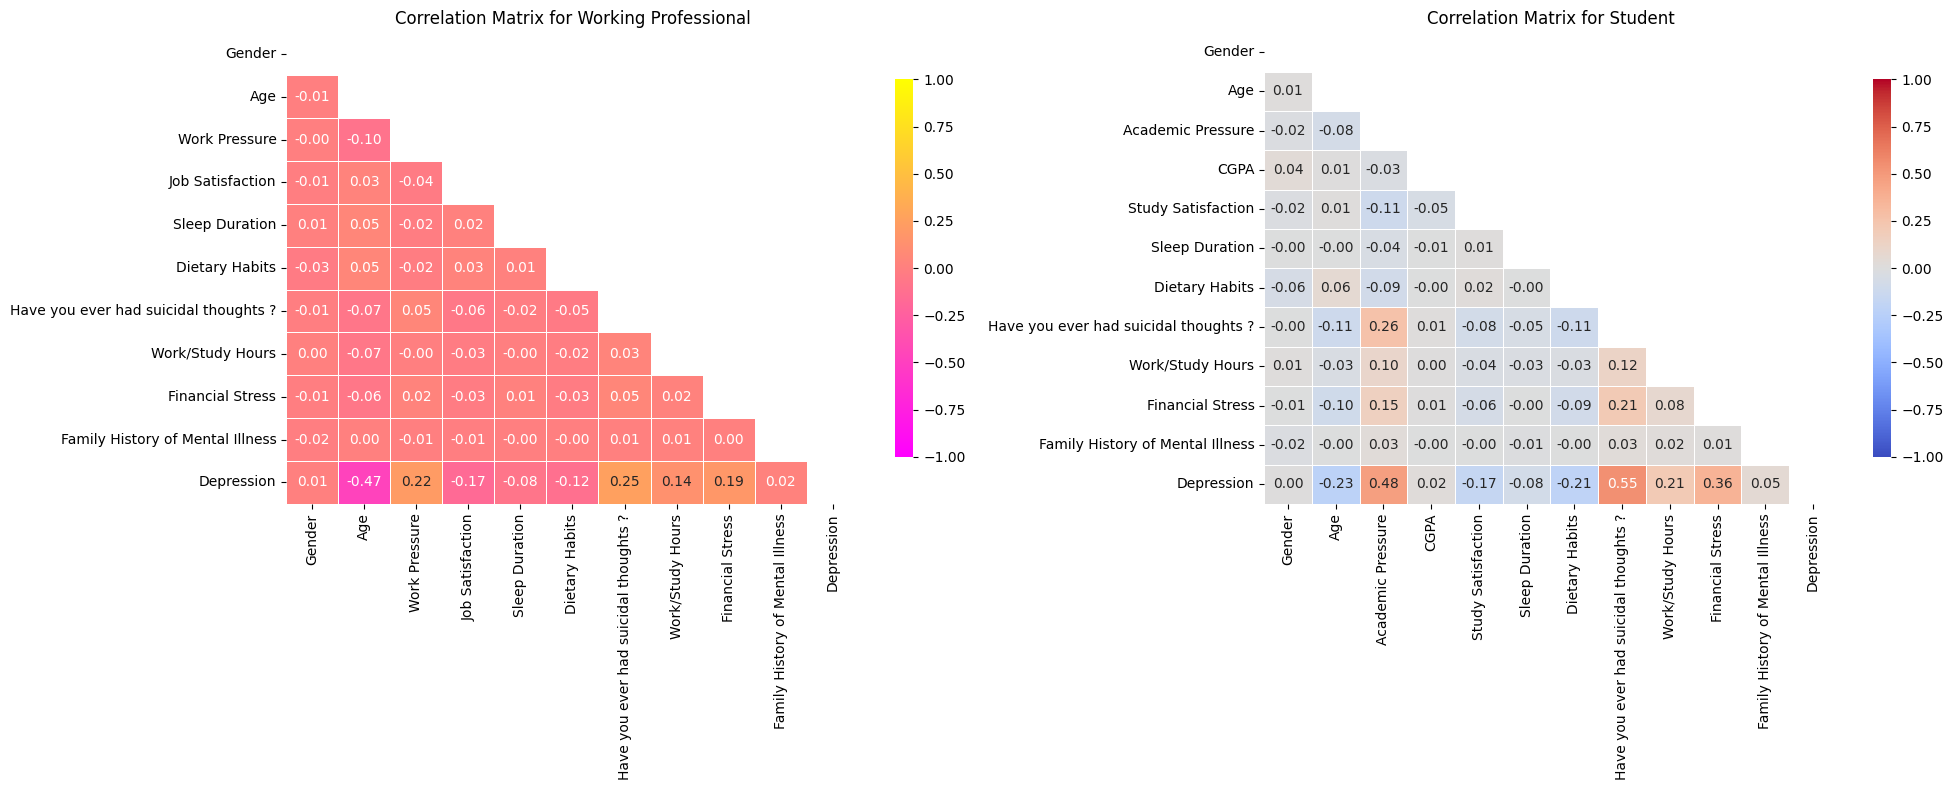

In [25]:
# Correlation matrix

_, axes = plt.subplots(1, 2,figsize=(20, 8))

# Correlation matrix for working professional
cols_for_corr_working = ['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',  
                         'Work/Study Hours', 'Financial Stress',  'Family History of Mental Illness',  'Depression']
corr_working = df_working[cols_for_corr_working].corr()

mask = np.triu(np.ones_like(corr_working, dtype=bool))
sns.heatmap(corr_working, annot=True, mask=mask, fmt='.2f', cmap='spring', vmin=-1, vmax=1, linewidths=.5, cbar_kws={'shrink': .8}, ax=axes[0])
axes[0].set_title('Correlation Matrix for Working Professional')


# Correlation matrix for student
cols_for_corr_student = ['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',  
                         'Work/Study Hours', 'Financial Stress',  'Family History of Mental Illness',  'Depression']
corr_student = df_student[cols_for_corr_student].corr()

mask = np.triu(np.ones_like(corr_student, dtype=bool))
sns.heatmap(corr_student, annot=True, mask=mask, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, cbar_kws={'shrink': .8}, ax=axes[1])
axes[1].set_title('Correlation Matrix for Student')


plt.tight_layout()
plt.show()

### Correlation Matrix Insights

**1. Working Professionals**
- **Age (-0.47)** is the strongest predictor, Younger professionals tend to show significantly higher depression levels.
- **Work Pressure (0.22)** and **Suicidal Thoughts(0.25)** **Financial Stress (0.19)** have moderate positive associations.
- **Job Satisfaction (-0.17)**, **Work/Study Hours (0.14)** and **Dietary Habits (-0.12)** have weak impact on depression.

**2. Students**
- **Suicidal Thoughts (0.55)** is the strongest driver.
- **Academic Pressure (0.48)** and **Financial Stress (0.36)** are also strong predictors of depression among students.
- **Age (-0.23)**, **Dietary Habits (-0.21)**, and **Work/Study Hours (0.21)** have moderate effects.
- **Study Satisfaction (-0.17)** provides weak impact on depression.
- **CGPA (0.05)** shows nearly no correlation, confirming academic performance is not a depression predictor.

**3. Comparison**
- **Suicidal Thoughts** and **Financial Stress**: Twice as impactful for students than professionals (0.55 vs 0.25 and 0.36 vs 0.18).
- **Dietary Habits**: More consequential for students (-0.21) than professionals (-0.12).
- **Work/Study Hours**: impacts students (0.21) more than working adults (0.14).
- **Gender**, **Sleep Duration** and **Family History of Mental Illness** show basically no impact on depression.

# Handling Missing Data

In [26]:
# # Mã hóa các biến phân loại thành số
# gender={
#     'Male':1,
#     'Female':0,
# }

# work={
#     'Working Professional':1,
#     'Student':0,
# }

# suicidal_thought={
#     'Yes':1,
#     'No':0,
# }

# family_history={
#     'Yes':1,
#     'No':0,
# }

# sleep={
#     'Less than 5 hours':4,
#     '7-8 hours':7.5,
#     'More than 8 hours':9, 
#     '5-6 hours':5.5,
#     '3-4 hours':3.5,
# }

# diet={
#     'Healthy':2,
#     'Moderate':1,
#     'Unhealthy':0,   
# }

# # Xử lý dữ liệu train
# df_train['Gender'] = df_train['Gender'].map(gender)
# df_train['Working Professional or Student'] = df_train['Working Professional or Student'].map(work)
# df_train['Have you ever had suicidal thoughts ?'] = df_train['Have you ever had suicidal thoughts ?'].map(suicidal_thought)
# df_train['Family History of Mental Illness'] = df_train['Family History of Mental Illness'].map(family_history)
# df_train['Sleep Duration'] = df_train['Sleep Duration'].map(sleep)
# df_train['Dietary Habits'] = df_train['Dietary Habits'].map(diet)

# # Xử lý dữ liệu test
# df_test['Gender'] = df_test['Gender'].map(gender)
# df_test['Working Professional or Student'] = df_test['Working Professional or Student'].map(work)
# df_test['Have you ever had suicidal thoughts ?'] = df_test['Have you ever had suicidal thoughts ?'].map(suicidal_thought)
# df_test['Family History of Mental Illness'] = df_test['Family History of Mental Illness'].map(family_history)
# df_test['Sleep Duration'] = df_test['Sleep Duration'].map(sleep)
# df_test['Dietary Habits'] = df_test['Dietary Habits'].map(diet)

In [27]:
# # Gán Academic Pressure = 0 nếu là Working Professional và giá trị bị thiếu
# # Xử lý dữ liệu train
# df_train['Academic Pressure'] = np.where(
#     (df_train['Working Professional or Student'] == 1) & (df_train['Academic Pressure'].isna()),
#     0,
#     df_train['Academic Pressure']
# )
# # Xử lý dữ liệu test
# df_test['Academic Pressure'] = np.where(
#     (df_test['Working Professional or Student'] == 1) & (df_test['Academic Pressure'].isna()),
#     0,
#     df_test['Academic Pressure']
# )


# # Gán Work Pressure = 0 nếu là Student và giá trị bị thiếu
# # Xử lý dữ liệu train
# df_train['Work Pressure'] = np.where(
#     (df_train['Working Professional or Student'] == 0) & (df_train['Work Pressure'].isna()),
#     0,
#     df_train['Work Pressure']
# )
# # Xử lý dữ liệu test
# df_test['Work Pressure'] = np.where(
#     (df_test['Working Professional or Student'] == 0) & (df_test['Work Pressure'].isna()),
#     0,
#     df_test['Work Pressure']
# )

In [28]:
# # Gán Study Satisfaction = 0 nếu là Working Professional và giá trị bị thiếu
# # Xử lý dữ liệu train
# df_train['Study Satisfaction'] = np.where(
#     (df_train['Working Professional or Student'] == 1) & (df_train['Study Satisfaction'].isna()),
#     0,
#     df_train['Study Satisfaction']
# )
# # Xử lý dữ liệu test
# df_test['Study Satisfaction'] = np.where(
#     (df_test['Working Professional or Student'] == 1) & (df_test['Study Satisfaction'].isna()),
#     0,
#     df_test['Study Satisfaction']
# )



# # Gán Job Satisfaction = 0 nếu là Student và giá trị bị thiếu
# # Xử lý dữ liệu train
# df_train['Job Satisfaction'] = np.where(
#     (df_train['Working Professional or Student'] == 0) & (df_train['Job Satisfaction'].isna()),
#     0,
#     df_train['Job Satisfaction']
# )
# # Xử lý dữ liệu test
# df_test['Job Satisfaction'] = np.where(
#     (df_test['Working Professional or Student'] == 0) & (df_test['Job Satisfaction'].isna()),
#     0,
#     df_test['Job Satisfaction']
# )

In [29]:
# # Xử lí dữ liệu bị thiếu còn lại
# categorical_cols = ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Financial Stress']
# numeric_cols = ['Age', 'CGPA', 'Work/Study Hours']

# # Dùng trung vị để điền vào các cột số
# for col in numeric_cols:
#     med=df_train[col].median()
#     df_train = df_train.fillna({col:med}) # Điền cho train
#     df_test = df_test.fillna({col:med}) # Điền cho test

# # Dùng mode để điền vào các cột thứ bậc
# for col in categorical_cols:
#     df_train[col] = df_train[col].fillna(df_train[col].mode()[0]) # Điền cho train
#     df_test[col] = df_test[col].fillna(df_test[col].mode()[0]) # Điền cho test

# # Dùng 'missing' để điền vào các giá trị còn lại
# df_train = df_train.fillna(value='missing') # Điền cho train
# df_test = df_test.fillna(value='missing') # Điền cho test